In [43]:
%pip install pandas torch tqdm matplotlib imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import torch.nn as nn
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [45]:
df = pd.read_csv("../df_unbalanced_classification.csv")

selected_feature = [
    "differentiate",
    "Node Positive Ratio",
    "N Stage Encoded",
    "Estrogen Status Encoded",
    "Progesterone Status Encoded",
]

# X = df.drop(columns=["Survival More Than 6 Years"]).values
X = df[selected_feature].values
y = df["Status_encoded"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [46]:
class SLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SLP, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [47]:
def train(model, train_loader, criterion, optimizer, epochs=50):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_acc = 0
        train_loss = 0

        for X_batch, y_batch in tqdm(
            train_loader, desc=f"Epoch {epoch + 1}/{epochs} - Training"
        ):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == y_batch).sum().item()

        avg_train_loss = train_loss / len(train_dataset)
        avg_train_acc = train_acc / len(train_dataset)

        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_acc)

        model.eval()
        val_acc = 0
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in tqdm(
                test_loader, desc=f"Epoch {epoch + 1}/{epochs} - Validation"
            ):
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == y_batch).sum().item()

        avg_val_loss = val_loss / len(test_dataset)
        avg_val_acc = val_acc / len(test_dataset)
        val_losses.append(avg_val_loss)
        val_accuracies.append(avg_val_acc)

        print(
            f"Epoch {epoch + 1}/{epochs} - "
            f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, "
            f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}"
        )

    return train_losses, train_accuracies, val_losses, val_accuracies

In [48]:
model = SLP(input_dim=X_train_tensor.shape[1], output_dim=2)

criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100

train_losses, train_accuracies, val_losses, val_accuracies = train(
    model, train_loader, criterion, optimizer, epochs=epochs
)

Epoch 1/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3899.17it/s]


Epoch 1/100 - Train Loss: 0.0205, Train Acc: 0.6738, Val Loss: 0.0188, Val Acc: 0.7379


Epoch 2/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4986.60it/s]


Epoch 2/100 - Train Loss: 0.0181, Train Acc: 0.7409, Val Loss: 0.0171, Val Acc: 0.7963


Epoch 3/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4958.26it/s]


Epoch 3/100 - Train Loss: 0.0165, Train Acc: 0.7869, Val Loss: 0.0158, Val Acc: 0.8311


Epoch 4/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5082.11it/s]


Epoch 4/100 - Train Loss: 0.0154, Train Acc: 0.8180, Val Loss: 0.0150, Val Acc: 0.8522


Epoch 5/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4748.82it/s]


Epoch 5/100 - Train Loss: 0.0145, Train Acc: 0.8354, Val Loss: 0.0143, Val Acc: 0.8596


Epoch 6/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5037.50it/s]


Epoch 6/100 - Train Loss: 0.0139, Train Acc: 0.8431, Val Loss: 0.0137, Val Acc: 0.8634


Epoch 7/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5181.11it/s]


Epoch 7/100 - Train Loss: 0.0134, Train Acc: 0.8490, Val Loss: 0.0133, Val Acc: 0.8696


Epoch 8/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5296.35it/s]


Epoch 8/100 - Train Loss: 0.0131, Train Acc: 0.8487, Val Loss: 0.0130, Val Acc: 0.8696


Epoch 9/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5146.14it/s]


Epoch 9/100 - Train Loss: 0.0128, Train Acc: 0.8475, Val Loss: 0.0128, Val Acc: 0.8683


Epoch 10/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4857.11it/s]


Epoch 10/100 - Train Loss: 0.0126, Train Acc: 0.8481, Val Loss: 0.0126, Val Acc: 0.8683


Epoch 11/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5091.13it/s]


Epoch 11/100 - Train Loss: 0.0124, Train Acc: 0.8493, Val Loss: 0.0125, Val Acc: 0.8683


Epoch 12/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5159.53it/s]


Epoch 12/100 - Train Loss: 0.0123, Train Acc: 0.8496, Val Loss: 0.0124, Val Acc: 0.8671


Epoch 13/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5336.79it/s]


Epoch 13/100 - Train Loss: 0.0122, Train Acc: 0.8493, Val Loss: 0.0123, Val Acc: 0.8671


Epoch 14/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4821.04it/s]


Epoch 14/100 - Train Loss: 0.0122, Train Acc: 0.8500, Val Loss: 0.0123, Val Acc: 0.8671


Epoch 15/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5005.83it/s]


Epoch 15/100 - Train Loss: 0.0121, Train Acc: 0.8500, Val Loss: 0.0123, Val Acc: 0.8671


Epoch 16/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5011.81it/s]


Epoch 16/100 - Train Loss: 0.0121, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8671


Epoch 17/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5093.03it/s]


Epoch 17/100 - Train Loss: 0.0120, Train Acc: 0.8509, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 18/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4982.72it/s]


Epoch 18/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 19/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5137.41it/s]


Epoch 19/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 20/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5427.90it/s]


Epoch 20/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 21/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5359.87it/s]


Epoch 21/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 22/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5592.69it/s]


Epoch 22/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 23/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4909.59it/s]


Epoch 23/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 24/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3656.88it/s]


Epoch 24/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 25/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4648.82it/s]


Epoch 25/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 26/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5149.79it/s]


Epoch 26/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 27/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5255.77it/s]


Epoch 27/100 - Train Loss: 0.0120, Train Acc: 0.8490, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 28/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5205.09it/s]


Epoch 28/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 29/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5135.24it/s]


Epoch 29/100 - Train Loss: 0.0120, Train Acc: 0.8509, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 30/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5075.25it/s]


Epoch 30/100 - Train Loss: 0.0119, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 31/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5237.59it/s]


Epoch 31/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 32/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5347.78it/s]


Epoch 32/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 33/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4785.50it/s]


Epoch 33/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 34/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4978.18it/s]


Epoch 34/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8671


Epoch 35/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5086.14it/s]


Epoch 35/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 36/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5037.74it/s]


Epoch 36/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 37/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5225.04it/s]


Epoch 37/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 38/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5149.54it/s]


Epoch 38/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 39/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5239.86it/s]


Epoch 39/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 40/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5207.33it/s]


Epoch 40/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 41/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5216.80it/s]


Epoch 41/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 42/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5248.43it/s]


Epoch 42/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 43/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5502.67it/s]


Epoch 43/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 44/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5285.57it/s]


Epoch 44/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 45/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5439.27it/s]


Epoch 45/100 - Train Loss: 0.0119, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 46/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5584.10it/s]


Epoch 46/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 47/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5420.34it/s]


Epoch 47/100 - Train Loss: 0.0120, Train Acc: 0.8509, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 48/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5316.75it/s]


Epoch 48/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 49/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5311.57it/s]


Epoch 49/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 50/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5216.55it/s]


Epoch 50/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 51/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5105.19it/s]


Epoch 51/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 52/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5454.23it/s]


Epoch 52/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 53/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5390.87it/s]


Epoch 53/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 54/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5247.17it/s]


Epoch 54/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 55/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4340.03it/s]


Epoch 55/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 56/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5274.83it/s]


Epoch 56/100 - Train Loss: 0.0119, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 57/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5305.89it/s]


Epoch 57/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 58/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5377.31it/s]


Epoch 58/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 59/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5306.40it/s]


Epoch 59/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 60/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4838.15it/s]


Epoch 60/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 61/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4797.92it/s]


Epoch 61/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 62/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5289.67it/s]


Epoch 62/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 63/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5230.31it/s]


Epoch 63/100 - Train Loss: 0.0120, Train Acc: 0.8490, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 64/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5276.11it/s]


Epoch 64/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 65/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5148.33it/s]


Epoch 65/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 66/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3846.09it/s]


Epoch 66/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 67/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5416.84it/s]


Epoch 67/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 68/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5173.98it/s]


Epoch 68/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 69/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5126.06it/s]


Epoch 69/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 70/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4977.72it/s]


Epoch 70/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 71/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5165.64it/s]


Epoch 71/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 72/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5217.79it/s]


Epoch 72/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 73/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5109.01it/s]


Epoch 73/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 74/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5276.11it/s]


Epoch 74/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 75/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5223.29it/s]


Epoch 75/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 76/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5304.85it/s]


Epoch 76/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 77/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5421.15it/s]


Epoch 77/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 78/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5416.57it/s]


Epoch 78/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 79/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5447.15it/s]


Epoch 79/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 80/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5310.54it/s]


Epoch 80/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 81/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5148.57it/s]


Epoch 81/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 82/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5147.36it/s]


Epoch 82/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 83/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5296.35it/s]


Epoch 83/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 84/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5207.33it/s]


Epoch 84/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 85/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4964.58it/s]


Epoch 85/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 86/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5335.48it/s]


Epoch 86/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 87/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5412.27it/s]


Epoch 87/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 88/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5354.08it/s]


Epoch 88/100 - Train Loss: 0.0120, Train Acc: 0.8493, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 89/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5255.77it/s]


Epoch 89/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 90/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5332.35it/s]


Epoch 90/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 91/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5375.46it/s]


Epoch 91/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 92/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5369.90it/s]


Epoch 92/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 93/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5387.41it/s]


Epoch 93/100 - Train Loss: 0.0120, Train Acc: 0.8496, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 94/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5311.06it/s]


Epoch 94/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8671


Epoch 95/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5331.05it/s]


Epoch 95/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 96/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5288.90it/s]


Epoch 96/100 - Train Loss: 0.0120, Train Acc: 0.8506, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 97/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5240.86it/s]


Epoch 97/100 - Train Loss: 0.0120, Train Acc: 0.8503, Val Loss: 0.0122, Val Acc: 0.8646


Epoch 98/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5195.92it/s]


Epoch 98/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 99/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4285.45it/s]


Epoch 99/100 - Train Loss: 0.0120, Train Acc: 0.8509, Val Loss: 0.0122, Val Acc: 0.8658


Epoch 100/100 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5257.79it/s]

Epoch 100/100 - Train Loss: 0.0120, Train Acc: 0.8500, Val Loss: 0.0122, Val Acc: 0.8646


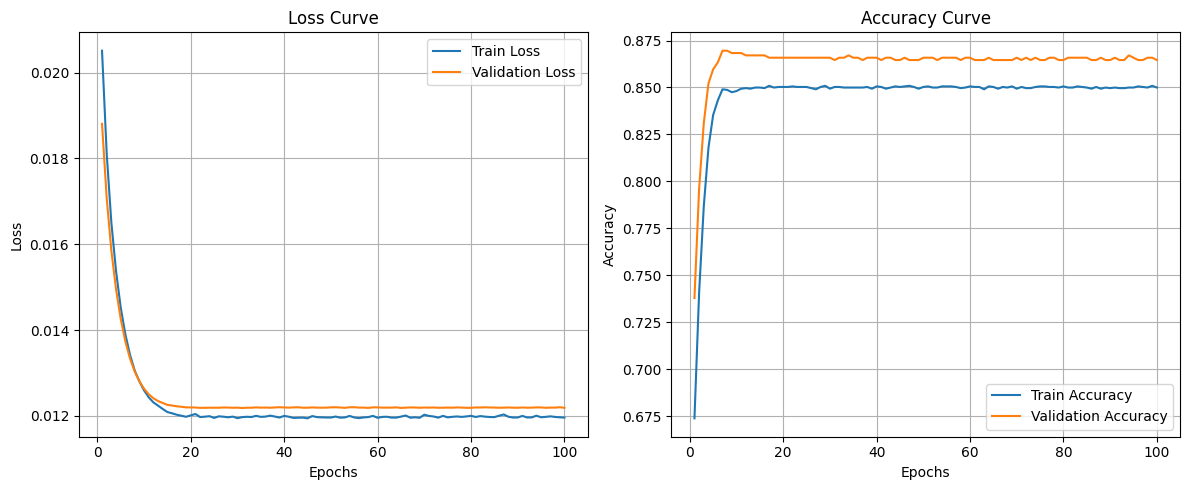

In [49]:
epochs_range = list(range(1, epochs + 1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
axs[0].plot(epochs_range, train_losses, label="Train Loss")
axs[0].plot(epochs_range, val_losses, label="Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss Curve")
axs[0].legend()
axs[0].grid(True)

# Plot Accuracy
axs[1].plot(epochs_range, train_accuracies, label="Train Accuracy")
axs[1].plot(epochs_range, val_accuracies, label="Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Curve")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
